### COMPETIÇÃO DSA DE MACHINE LEARNING 6 EDIÇÃO - KERNEL 30 LUGAR

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.utils import resample
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler

In [2]:
# Leitura dos arquivos
train = pd.read_csv("dataset_treino.csv")
teste = pd.read_csv("dataset_teste.csv")

In [3]:
train.shape

(114321, 133)

In [4]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
teste.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [6]:
train.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
           ...   
v127      float64
v128      float64
v129        int64
v130      float64
v131      float64
Length: 133, dtype: object

In [7]:
# Separando variáveis numericas
num_vars = train.select_dtypes(np.number)
num_vars.head(5)

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [8]:
test_num_vars = teste.select_dtypes(np.number)
test_num_vars.head(5)

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,1.312911,...,3.267328,7.619048,1.815241,1.112270e-07,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,1.575492,...,2.500001,5.714286,1.970928,1.412265e-02,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,1.575493,...,4.149590,4.404040,8.163614,1.100329e+00,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,1.050328,...,1.676217,6.580644,1.325654,2.584588e-01,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [9]:
# Separando variáveis numericas
cat_vars = train.select_dtypes(np.object)
cat_vars.head(5)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


In [10]:
test_cat_vars = teste.select_dtypes(np.object)
test_cat_vars.head(5)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,AFPB,E,NaN,A,J,C,AF,A,F,B,D,Q,B,B,A,U,NaN,AF
1,C,FOG,D,A,A,C,A,DI,C,F,B,D,E,C,D,B,E,NaN,I
2,C,HXZ,B,C,A,I,A,DO,C,F,B,D,C,C,D,A,Q,AJ,AV
3,C,AGMU,E,E,A,I,A,CN,B,F,B,D,C,B,B,A,F,G,B
4,C,AWW,E,C,A,I,H,NaN,B,F,B,D,C,B,B,A,A,I,A


In [11]:
#cat_vars = [c for i, c in enumerate(train.columns) if train.dtypes[i] in [np.object]]
#cat_vars

#num_vars = [c for i, c in enumerate(train.columns) if train.dtypes[i] in [np.int64, np.float]]
#num_vars

In [12]:
num_vars.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v4        float64
           ...   
v127      float64
v128      float64
v129        int64
v130      float64
v131      float64
Length: 114, dtype: object

In [13]:
cat_vars.dtypes

v3      object
v22     object
v24     object
v30     object
v31     object
v47     object
v52     object
v56     object
v66     object
v71     object
v74     object
v75     object
v79     object
v91     object
v107    object
v110    object
v112    object
v113    object
v125    object
dtype: object

In [14]:
# Transformando as variáveis para o dtypes category
for col in cat_vars:
    train[col] = train[col].astype("category")

In [15]:
for col in test_cat_vars:
    teste[col] = teste[col].astype("category")

In [16]:
train.dtypes

ID           int64
target       int64
v1         float64
v2         float64
v3        category
            ...   
v127       float64
v128       float64
v129         int64
v130       float64
v131       float64
Length: 133, dtype: object

In [17]:
train.head(5)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [18]:
missing = train.isna().sum(axis = 0)
missing

ID            0
target        0
v1        49832
v2        49796
v3         3457
          ...  
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int64

In [19]:
test_missing = teste.isna().sum(axis = 0)
missing

ID            0
target        0
v1        49832
v2        49796
v3         3457
          ...  
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int64

49879.0


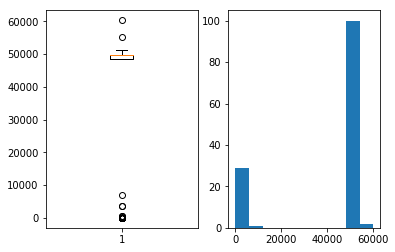

In [20]:
# Construção do grafico teste
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(test_missing)
ax2.hist(test_missing)
median = test_missing.median()
print(median)

49832.0


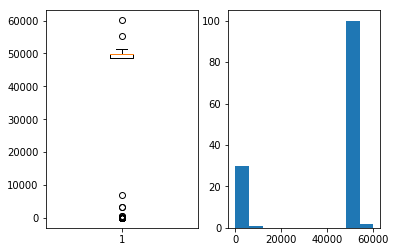

In [21]:
# Construção do grafico treino
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(missing)
ax2.hist(missing)
median = missing.median()
print(median)

In [22]:
# Nesta etapa iremos utilizar somente as variáveis que contenham 25% de valores missing. O corte será 28580.
num_entries = len(train)
variancia = 0.25
num_entries * variancia

28580.25

In [23]:
num_entries = len(teste)
variancia = 0.25
num_entries * variancia

28598.25

In [24]:
# Verificação de quantas colunas restaram
keep_vars = np.array(train.columns[(missing <= (num_entries * variancia))])
len(keep_vars)

31

In [25]:
# Atualizando as variaveis num_vars e cat_vars com a definição acima
num_vars = [col for col in num_vars if col in keep_vars]
cat_vars = [col for col in cat_vars if col in keep_vars]
test_num_vars = [col for col in test_num_vars if col in keep_vars]
test_cat_vars = [col for col in test_cat_vars if col in keep_vars]

In [26]:
len(cat_vars)

17

In [27]:
len(num_vars)

14

In [28]:
len(test_cat_vars)

17

In [29]:
len(test_num_vars)

13

In [30]:
# Inserindo a media nos valores nan. Lembrando que esta técnica quando se tem muitos registros nan pode não ser a adequada,
# mas como reduzimos a quantidade de variáveis agora pode fazer sentido.
# Variaveis numericas preenche com média
for col in num_vars:
    col_mean = train[col].mean()
    train[col] = train[col].fillna(col_mean)    

In [31]:
# Variaveis categoricas preenche com missing(nova categoria)
for col in cat_vars:
    train[col] = train[col].cat.add_categories("missing")
    train[col] = train[col].fillna("missing")

In [32]:
for col in test_num_vars:
    col_mean = teste[col].mean()
    teste[col] = teste[col].fillna(col_mean)  

In [33]:
for col in test_cat_vars:
    teste[col] = teste[col].cat.add_categories("missing")
    teste[col] = teste[col].fillna("missing")

In [34]:
train.head(10)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,0.049861,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,0.899806,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,0.083758,BJ,3.276100,1.623298,2.266575,0,2.263736,0.970873
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651,8.462619,missing,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,0.018659,S,1.159637,5.582865,1.105283,0,1.170731,3.333334
9,23,1,1.144802,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,0.008944,E,1.344550,1.601176,1.928009,0,3.174603,1.000000


In [35]:
teste.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


In [36]:
# Verificando a quantidade de categorias por coluna. Somente nas variáveis categoricas.
# comando set retorna os valores unicos em ordem crescente
cat_per_feature = train[cat_vars].apply(lambda x: len(set(x)))

In [37]:
cat_per_feature

v3          4
v22     18211
v24         5
v31         4
v47        10
v52        13
v56       123
v66         3
v71         9
v74         3
v75         4
v79        18
v91         8
v107        8
v110        3
v112       23
v125       91
dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.00000e+00, 1.82380e+03, 3.64460e+03, 5.46540e+03, 7.28620e+03,
        9.10700e+03, 1.09278e+04, 1.27486e+04, 1.45694e+04, 1.63902e+04,
        1.82110e+04]),
 <a list of 10 Patch objects>)

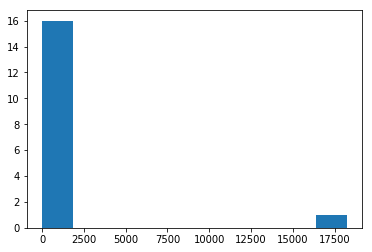

In [38]:
# Histograma com a distribuição das categorias 
plt.hist(cat_per_feature)

In [39]:
test_cat_per_feature = teste[test_cat_vars].apply(lambda x: len(set(x)))

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.0000e+00, 1.8280e+03, 3.6530e+03, 5.4780e+03, 7.3030e+03,
        9.1280e+03, 1.0953e+04, 1.2778e+04, 1.4603e+04, 1.6428e+04,
        1.8253e+04]),
 <a list of 10 Patch objects>)

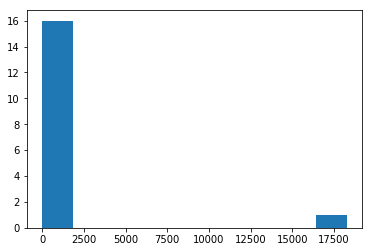

In [40]:
plt.hist(test_cat_per_feature)

In [41]:
# Extraindo as features que contenham qtd de categorias maior que 2500
cat_vars = np.array(cat_per_feature[cat_per_feature < 2500].index)
len(cat_vars)

16

In [42]:
# Extraindo as features que contenham qtd de categorias maior que 2500
test_cat_vars = np.array(test_cat_per_feature[test_cat_per_feature < 2500].index)
len(cat_vars)

16

In [43]:
# Unindo as variáveis
train2 = train[list(num_vars) + list(cat_vars)]
train2.head()

,ID,target,v10,v12,v14,v21,v34,v38,v40,v50,...,v66,v71,v74,v75,v79,v91,v107,v110,v112,v125
0,3,1,0.503281,6.085711,11.636387,7.730923,7.270147,0,7.711453,0.899420,...,C,F,B,D,E,A,E,B,O,AU
1,4,1,1.312910,6.507647,11.636386,6.763110,3.615077,0,14.305766,1.379210,...,A,F,B,D,D,B,B,A,U,AF
2,5,1,0.765864,6.384670,9.603542,5.245035,4.043864,0,13.077201,0.604504,...,A,B,B,B,E,G,C,B,S,AE
3,6,1,6.542669,9.646653,14.094723,7.517125,8.703550,0,11.523045,3.329176,...,A,F,B,D,B,B,B,B,J,CJ
4,8,1,1.050328,6.320087,10.991098,6.414567,6.083151,0,10.138920,1.364536,...,C,F,B,D,C,G,C,A,T,Z


In [44]:
# Atribuindo valores numericos as categorias. Notar que este procedimento aumenta e muito a base de dados
train_new = pd.get_dummies(train2)
train_new.shape

(114321, 351)

In [45]:
teste2 = teste[list(test_num_vars) + list(test_cat_vars)]
teste2.head()

,ID,v10,v12,v14,v21,v34,v38,v40,v50,v62,...,v66,v71,v74,v75,v79,v91,v107,v110,v112,v125
0,0,1.312911,6.961173,12.230137,7.437806,5.228503,0,11.754576,0.118847,1,...,A,F,B,D,Q,B,B,A,U,AF
1,1,1.291029,6.618289,10.760796,5.895192,8.387431,4,6.737574,1.027070,1,...,C,F,B,D,E,C,D,B,E,I
2,2,1.575492,6.894249,13.306189,8.253452,7.958990,0,7.701325,0.840731,1,...,C,F,B,D,C,C,D,A,Q,AV
3,7,1.575493,6.856236,10.397026,5.539484,6.223849,0,10.444974,0.946373,1,...,B,F,B,D,C,B,B,A,F,B
4,10,1.050328,6.273627,11.354501,6.741530,5.476858,0,11.097606,1.493654,2,...,B,F,B,D,C,B,B,A,A,A


In [46]:
# Atribuindo valores numericos as categorias. Notar que este procedimento aumenta e muito a base de dados
test_new = pd.get_dummies(teste2)
test_new.shape

(114393, 342)

In [47]:
train_new.head()

,ID,target,v10,v12,v14,v21,v34,v38,v40,v50,...,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z,v125_missing
0,3,1,0.503281,6.085711,11.636387,7.730923,7.270147,0,7.711453,0.899420,...,0,0,0,0,0,0,0,0,0,0
1,4,1,1.312910,6.507647,11.636386,6.763110,3.615077,0,14.305766,1.379210,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0.765864,6.384670,9.603542,5.245035,4.043864,0,13.077201,0.604504,...,0,0,0,0,0,0,0,0,0,0
3,6,1,6.542669,9.646653,14.094723,7.517125,8.703550,0,11.523045,3.329176,...,0,0,0,0,0,0,0,0,0,0
4,8,1,1.050328,6.320087,10.991098,6.414567,6.083151,0,10.138920,1.364536,...,0,0,0,0,0,0,0,0,1,0


In [48]:
# Dividindo os dados. O atributo iloc foi utilizado pois se trata de um dataframe e é necessário para se fazer o split
# por indexação.
# Lembrar aqui que o indice em python começa com 0, portanto como temos 274 colunas o meu x (é de 0 a 273) e (y é a 273), pois é
# a variável TARGET
x = train_new.iloc[:, 2:351]
y = train_new.iloc[:, 1]

In [49]:
# Fit nos dados de treino
feature_sel = XGBClassifier()
feature_sel.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

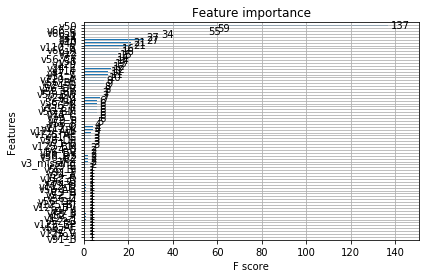

In [50]:
plot_importance(feature_sel)
plt.show()

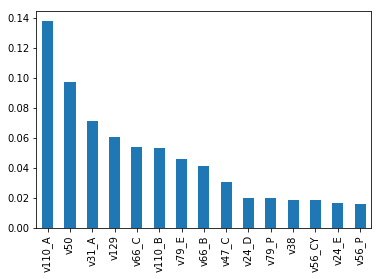

In [51]:
# Este trecho elenca as variáveis com maior importancia em forma gráfica
# Para rodar este trecho é necessário importar o pacote from xgboost import plot_importance
featimport = pd.Series(feature_sel.feature_importances_, index = x.columns)
featimport.nlargest(15).plot(kind ='bar') # aqui retornamos somente as 15 variáveis mais importantes
plt.show()

In [52]:
df = train_new[["ID", "target", "v110_A", "v50", "v31_A", "v129", "v66_C", "v110_B", 
               "v79_E", "v66_B", "v47_C", "v24_D", "v79_P", "v38", "v56_CY",
               "v24_E", "v56_P"]]

In [53]:
df_test = test_new[["ID", "v110_A", "v50", "v31_A", "v129", "v66_C", "v110_B", 
               "v79_E", "v66_B", "v47_C", "v24_D", "v79_P", "v38", "v56_CY",
               "v24_E", "v56_P"]]

In [54]:
# Divisão das classes em majoritária e minoritária
df_class_maj = df[df.target == 1]
df_class_min = df[df.target == 0]

In [55]:
df_res = resample(df_class_min,
                 replace = True, # amostra com substituição
                 n_samples = 87021,  # parametro para coincidir com a classe majoritaria(tamanho da classe)
                 random_state = 43) # parametro para poder reproduzir o resultado em outro notebook

In [56]:
df_balanced = pd.concat([df_class_maj, df_res])
df_balanced.target.value_counts()

1    87021
0    87021
Name: target, dtype: int64

In [57]:
df_test.head()

,ID,v110_A,v50,v31_A,v129,v66_C,v110_B,v79_E,v66_B,v47_C,v24_D,v79_P,v38,v56_CY,v24_E,v56_P
0,0,1,0.118847,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1.027070,1,0,1,1,1,0,1,1,0,4,0,0,0
2,2,1,0.840731,1,0,1,0,0,0,0,0,0,0,0,0,0
3,7,1,0.946373,1,0,0,0,0,1,0,0,0,0,0,1,0
4,10,1,1.493654,1,0,0,0,0,1,0,0,0,0,0,1,0


In [58]:
x_train = df_balanced.drop(['ID','target'], axis=1)
y_train = df_balanced['target']

# Padronizando os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [59]:
# Criando uma funcao para criação, execução e validação do modelo
def run_model(modelo, X_tr, y_tr, useTrainCV=True, cv_folds=5, early_stopping_rounds=10):
    
    # Utilização do Cross-Validation
    if useTrainCV:
        xgb_param = modelo.get_xgb_params()
        xgtrain = xgb.DMatrix(X_tr, label=y_tr)
        
        print ('Start cross validation')
        cvresult = xgb.cv(xgb_param, 
                          xgtrain, 
                          num_boost_round=modelo.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics=['logloss'],
                          stratified=True,
                          seed=42,
                          #verbose_eval=True,
                          early_stopping_rounds=early_stopping_rounds)

        modelo.set_params(n_estimators=cvresult.shape[0])
        best_tree = cvresult.shape[0]
        print('Best number of trees = {}'.format(best_tree))
    
    # Fit do modelo
    modelo.fit(X_tr, y_tr, eval_metric='logloss')
        
    # Predição no dataset de treino
    train_pred = modelo.predict(X_tr)
    train_pred_prob = modelo.predict_proba(X_tr)[:,1]
    
    # Exibir o relatorio do modelo
    #print("Acurácia : %.4g" % accuracy_score(y_tr, train_pred))
    #print("AUC Score (Treino): %f" % roc_auc_score(y_tr, train_pred_prob))
    print("Log Loss (Treino): %f" % log_loss(y_tr, train_pred_prob))
    print("Log Loss (Test): %f" % cvresult['test-logloss-mean'][best_tree-1])
    
    feature_imp = pd.Series(modelo.feature_importances_.astype(float)).sort_values(ascending=False)
    
    plt.figure(figsize=(18,8))
    feature_imp[:25].plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.tight_layout()

Start cross validation
Best number of trees = 200


C:\Users\DSA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Log Loss (Treino): 0.575948
Log Loss (Test): 0.581682


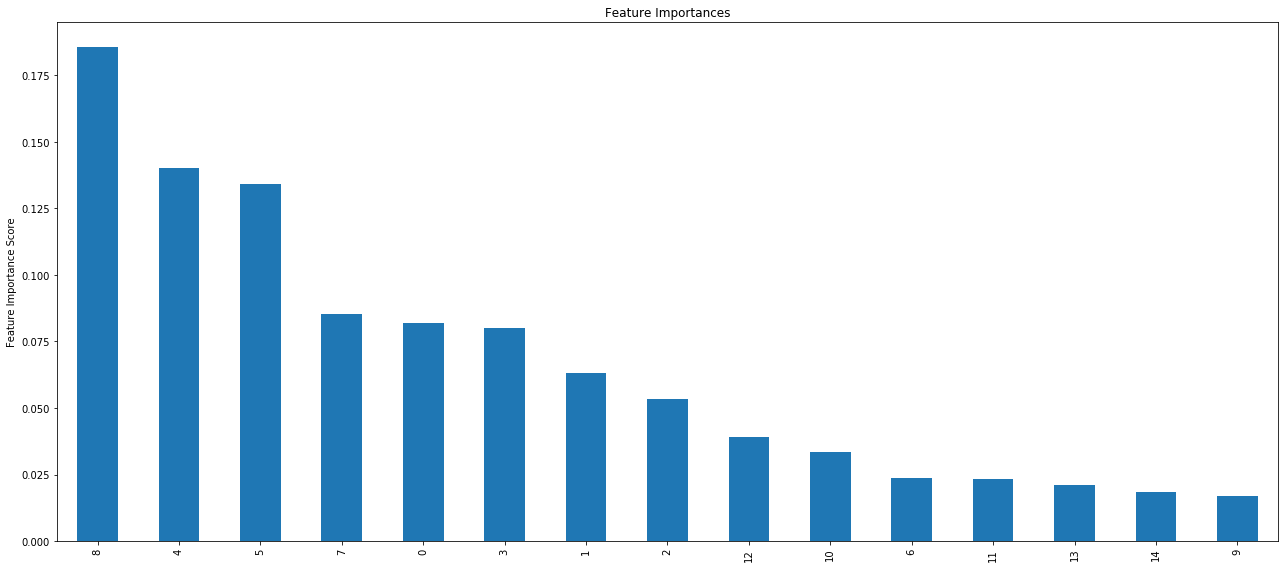

In [60]:
# Criando o primeiro modelo XGB
modeloXGB = XGBClassifier(learning_rate = 0.1,
                          n_estimators = 200,
                          max_depth = 5,
                          min_child_weight = 1,
                          gamma = 0,
                          subsample = 0.8,
                          colsample_bytree = 0.8,
                          objective = 'binary:logistic',
                          n_jobs = -1,
                          scale_pos_weight = 1,
                          seed = 42)

run_model(modeloXGB, x_train, y_train)

In [61]:
x_test = df_test.drop(["ID"], axis = 1)

In [62]:
# Aplicando escala aos dados
x_test = scaler.fit_transform(x_test)

# Realizando as previsoes
test_pred_prob = modeloXGB.predict_proba(x_test)[:,1]

In [63]:
submission = pd.DataFrame({'ID': teste["ID"], 'PredictedProb': test_pred_prob.reshape((test_pred_prob.shape[0]))})
print(submission.head(10))

   ID  PredictedProb
0   0       0.040213
1   1       0.801276
2   2       0.552018
3   7       0.350533
4  10       0.439497
5  11       0.238938
6  13       0.694281
7  14       0.226094
8  15       0.569562
9  16       0.673939


In [64]:
submission.to_csv('submission.csv', index=False)

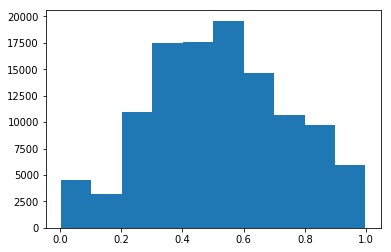

In [65]:
plt.hist(submission.PredictedProb)
plt.show()